In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X, y = load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

X_train = X[:-45]
X_test = X[-45:]

y_train = y[:-45]
y_test = y[-45:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [27]:
X.shape

(442, 1)

In [3]:
X_train.shape

(397, 1)

In [17]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

CPU times: user 999 µs, sys: 114 µs, total: 1.11 ms
Wall time: 729 µs


LinearRegression()

In [18]:
lr

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:\n", lr.coef_)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Coefficients:
 [953.02484976]
MSE: 3203.71
R2: 0.42


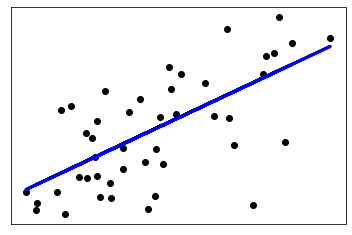

In [20]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
X, y = load_diabetes(return_X_y=True)

X_train = X[:-45]
X_test = X[-45:]

y_train = y[:-45]
y_test = y[-45:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [29]:
X.shape

(442, 10)

In [30]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

CPU times: user 13.9 ms, sys: 6.29 ms, total: 20.2 ms
Wall time: 13.1 ms


LinearRegression()

In [31]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:\n", lr.coef_)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Coefficients:
 [-4.35714430e-01 -2.37525679e+02  5.20204259e+02  3.04180610e+02
 -7.51600920e+02  4.29820391e+02  9.94829896e+01  2.14876948e+02
  6.89388576e+02  9.73230260e+01]
MSE: 1735.94
R2: 0.69


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [36]:
X.shape

(442, 10)

In [37]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

CPU times: user 1.91 ms, sys: 299 µs, total: 2.21 ms
Wall time: 1.35 ms


LinearRegression()

In [43]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:\n", lr.coef_)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Coefficients:
 [-4.35714430e-01 -2.37525679e+02  5.20204259e+02  3.04180610e+02
 -7.51600920e+02  4.29820391e+02  9.94829896e+01  2.14876948e+02
  6.89388576e+02  9.73230260e+01]
MSE: 1735.94
R2: 0.69


In [39]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [40]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

CPU times: user 1.61 ms, sys: 557 µs, total: 2.17 ms
Wall time: 1.13 ms


LinearRegression()

In [41]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:\n", lr.coef_)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Coefficients:
 [-4.35714430e-01 -2.37525679e+02  5.20204259e+02  3.04180610e+02
 -7.51600920e+02  4.29820391e+02  9.94829896e+01  2.14876948e+02
  6.89388576e+02  9.73230260e+01]
MSE: 1735.94
R2: 0.69


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5)
scores.mean(), scores.std()

CPU times: user 49.3 ms, sys: 3.45 ms, total: 52.7 ms
Wall time: 24.5 ms


(0.4823181221114939, 0.04926619776563216)

In [49]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
scores.mean(), scores.std()

CPU times: user 40.6 ms, sys: 3.01 ms, total: 43.6 ms
Wall time: 21.2 ms


(0.4823181221114939, 0.04926619776563216)

In [47]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [48]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
scores.mean(), scores.std()

CPU times: user 45.1 ms, sys: 3.81 ms, total: 48.9 ms
Wall time: 29.2 ms


(0.4823181221114939, 0.04926619776563216)

In [50]:
np.random.seed(42)

n_samples, n_features = 10**4, 100
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

y = np.dot(X, true_coef)

In [51]:
%%time
lr = LinearRegression()
lr.fit(X,y)
print (f'R2: {lr.score(X,y):.4f}')

R2: 1.0000
CPU times: user 94.6 ms, sys: 15.1 ms, total: 110 ms
Wall time: 52.4 ms


In [52]:
%%time
ridge = Ridge(alpha=0.0, solver='sparse_cg')
ridge.fit(X,y)
print (f'R2: {ridge.score(X,y):.4f}')

R2: 1.0000
CPU times: user 50.2 ms, sys: 3.72 ms, total: 53.9 ms
Wall time: 18.9 ms


In [53]:
np.random.seed(42)

n_samples, n_features = 10**5, 100
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

y = np.dot(X, true_coef)

# Add some noise
y += 15 * np.random.normal(size=(n_samples,))

In [54]:
%%time
lr = LinearRegression()
lr.fit(X,y)
print (f'R2: {lr.score(X,y):.4f}')

R2: 0.8068
CPU times: user 1.05 s, sys: 99.9 ms, total: 1.15 s
Wall time: 551 ms


In [55]:
%%time
ridge = Ridge(alpha=0.0, solver='sparse_cg')
ridge.fit(X,y)
print (f'R2: {ridge.score(X,y):.4f}')

R2: 0.8068
CPU times: user 294 ms, sys: 6.91 ms, total: 301 ms
Wall time: 122 ms


https://scikit-learn.org/stable/user_guide.html

https://scikit-learn.org/stable/modules/classes.html

https://scikit-learn.org/stable/auto_examples/index.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/sgd.html

https://scikit-learn.org/stable/modules/cross_validation.html